In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the sensor metadata CSV
df = pd.read_csv('leaf/leaf.csv')

In [3]:
# Display the first few rows
print(df.head())

   1  1.1  0.72694  1.4742  0.32396  0.98535      1.2  0.83592  0.0046566  \
0  1    2  0.74173  1.5257  0.36116  0.98152  0.99825  0.79867   0.005242   
1  1    3  0.76722  1.5725  0.38998  0.97755  1.00000  0.80812   0.007457   
2  1    4  0.73797  1.4597  0.35376  0.97566  1.00000  0.81697   0.006877   
3  1    5  0.82301  1.7707  0.44462  0.97698  1.00000  0.75493   0.007428   
4  1    6  0.72997  1.4892  0.34284  0.98755  1.00000  0.84482   0.004945   

   0.0039465   0.04779   0.12795  0.016108  0.0052323  0.00027477   1.1756  
0   0.005002  0.024160  0.090476  0.008119   0.002708    0.000075  0.69659  
1   0.010121  0.011897  0.057445  0.003289   0.000921    0.000038  0.44348  
2   0.008607  0.015950  0.065491  0.004271   0.001154    0.000066  0.58785  
3   0.010042  0.007938  0.045339  0.002051   0.000560    0.000024  0.34214  
4   0.004451  0.010487  0.058528  0.003414   0.001125    0.000025  0.34068  


In [4]:
# Show shape and column info
print("\nShape:", df.shape)
print("\nColumns:", df.columns)


Shape: (339, 16)

Columns: Index(['1', '1.1', '0.72694', '1.4742', '0.32396', '0.98535', '1.2', '0.83592',
       '0.0046566', '0.0039465', '0.04779', '0.12795', '0.016108', '0.0052323',
       '0.00027477', '1.1756'],
      dtype='object')


In [5]:
import numpy as np

# Optional: Rename columns to simple numeric names
df.columns = [f'f{i}' for i in range(len(df.columns))]

# Assume f0 is the label column (you can change it if needed)
y = df['f0'].values          # labels
X = df.drop(columns=['f0'])  # features


In [6]:
# Normalize features (important for LSTM)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM: (samples, time_steps, features)
# We'll fake time steps by reshaping each row as a sequence with 1 timestep
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Check the final shape
print("X shape for LSTM:", X_lstm.shape)
print("y shape:", y.shape)

X shape for LSTM: (339, 1, 15)
y shape: (339,)


In [7]:
# Show unique values and their counts
unique_labels = np.unique(y)
print("Unique labels:", unique_labels)
print("Number of classes:", len(unique_labels))

# Optional: preview some raw values
print("Sample y values:", y[:10])


Unique labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36]
Number of classes: 30
Sample y values: [1 1 1 1 1 1 1 1 1 1]


In [8]:
print("Min label:", y.min())
print("Max label:", y.max())
print("Unique values:", np.unique(y))


Min label: 1
Max label: 36
Unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36]


In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Assume y and X_lstm are already prepared from earlier steps

# Make sure labels are integers and start from 0
y = y.astype(int)
num_classes = y.max() + 1

# One-hot encode labels
y_cat = to_categorical(y, num_classes=num_classes)

# Build the LSTM model
model = Sequential([
    LSTM(32, input_shape=(1, 15)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_lstm, y_cat, epochs=30, batch_size=16, validation_split=0.2)


C:\Users\aruno\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.0438 - loss: 3.6018 - val_accuracy: 0.0000e+00 - val_loss: 3.6787
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0788 - loss: 3.5546 - val_accuracy: 0.0000e+00 - val_loss: 3.7870
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1227 - loss: 3.4932 - val_accuracy: 0.0000e+00 - val_loss: 3.9783
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1404 - loss: 3.4020 - val_accuracy: 0.0000e+00 - val_loss: 4.3247
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1429 - loss: 3.2668 - val_accuracy: 0.0000e+00 - val_loss: 4.8700
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1503 - loss: 3.1597 - val_accuracy: 0.0000e+00 - val_loss: 5.4447
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1385 - loss: 3.0507 - val_accuracy: 0.0000e+00 - val_loss: 6.0146
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1862 - loss: 2.936

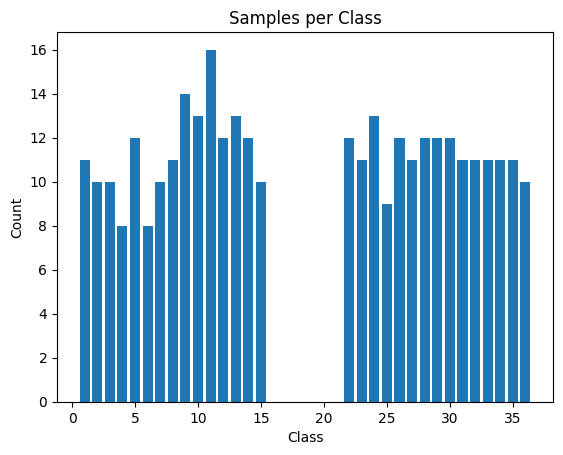

In [10]:
import matplotlib.pyplot as plt

(unique, counts) = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.title("Samples per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on validation set
from sklearn.model_selection import train_test_split

# Redo the train-test split
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Retrain using y_train
y_train_cat = to_categorical(y_train, num_classes=num_classes)
model.fit(X_train, y_train_cat, epochs=30, batch_size=16)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4859 - loss: 3.5960 
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4544 - loss: 2.8063 
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4327 - loss: 2.8154 
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5027 - loss: 2.4757 
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4334 - loss: 2.2608 
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4323 - loss: 2.0047 
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4540 - loss: 1.9258  
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4701 - loss: 1.8385 
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4851 - loss: 1.7896  
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5135 - loss: 1.7132 
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5188 - loss: 1.6697  
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accurac

In [12]:
# Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


In [13]:
# Report
print("Classification Report:\n")
print(classification_report(y_val, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         2
           7       0.25      1.00      0.40         1
           8       1.00      0.80      0.89         5
           9       0.50      0.33      0.40         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         7
          12       0.20      0.50      0.29         2
          13       0.40      1.00      0.57         2
          14       0.00      0.00      0.00         2
          15       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         4
          23       1.00      1.00      1.00         1
   

C:\Users\aruno\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aruno\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aruno\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aruno\

In [14]:
# Save the full model
model.save("lstm_sensor_model.h5")
print("✅ LSTM model saved as 'lstm_sensor_model.h5'")


✅ LSTM model saved as 'lstm_sensor_model.h5'
